#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 04
**CH04A Management quality and firm size: describing patterns of association**

using the wms-management-survey dataset

version 1.0 2021-05-05

In [299]:
import os
import sys

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

In [300]:
import warnings

warnings.filterwarnings("ignore")


In [301]:
# Import data
path_to_file = "D:\download\wms_da_textbook.csv"
df = pd.read_csv(path_to_file)


In [302]:
# Sample selection
df = df.loc[
    (df["country"] == "United States")
    & (df["wave"] == 2004)
    & (df["emp_firm"] >= 100)
    & (df["emp_firm"] <= 5000)
]

In [303]:
df.emp_firm.describe()

count     265.000000
mean      824.045283
std      1057.106979
min       100.000000
25%       200.000000
50%       350.000000
75%      1000.000000
max      5000.000000
Name: emp_firm, dtype: float64

In [304]:
# Save workfile
df.to_csv("D:\download\da_case_studies-master\da_case_studies-master\ch04-management-firm-size\ch04-wms-work.csv", index=False)
# Summary
df.filter(["management", "emp_firm"]).describe()


,management,emp_firm
count,265.000000,265.000000
mean,3.348101,824.045283
std,0.750320,1057.106979
min,1.647059,100.000000
25%,2.777778,200.000000
50%,3.333333,350.000000
75%,3.944444,1000.000000
max,4.944445,5000.000000


### Figure 4.1 Distribution of the management score variable

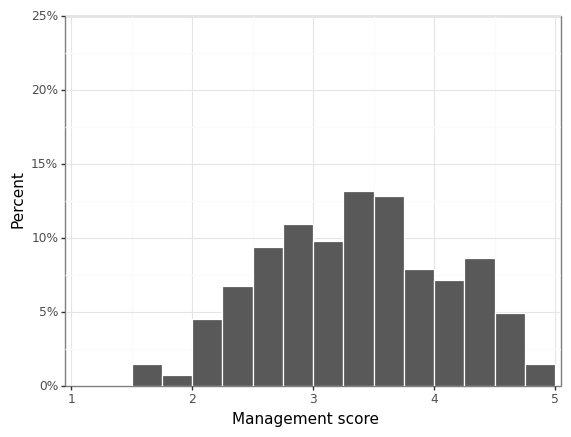

<ggplot: (121605504373)>

In [305]:
(
    ggplot(df, aes(x="management"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        color="white",
        binwidth=0.25,
        boundary=0,
        closed="left",
    )
    + labs(x="Management score", y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(1, 5))
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.25),
        labels=percent_format(),
    )
    + theme_bw()
)


### Figure 4.2 The distribution of employment

(a) Number of employees

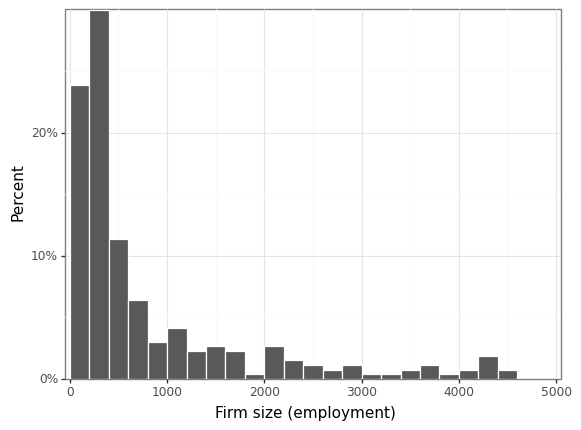

<ggplot: (121605583680)>

In [306]:
(
    ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
         color="white", binwidth=200, boundary=0, closed="left"
    )
    + labs(x="Firm size (employment)", y="Percent")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 5000), 
    )
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.3),
        labels=percent_format(),
    )
    + theme_bw()
)


In [307]:
df["lnemp"] = np.log(df.emp_firm)
df["lnemp"].describe()


count    265.000000
mean       6.102027
std        1.055003
min        4.605170
25%        5.298317
50%        5.857933
75%        6.907755
max        8.517193
Name: lnemp, dtype: float64

(b) Natural log of number of employees

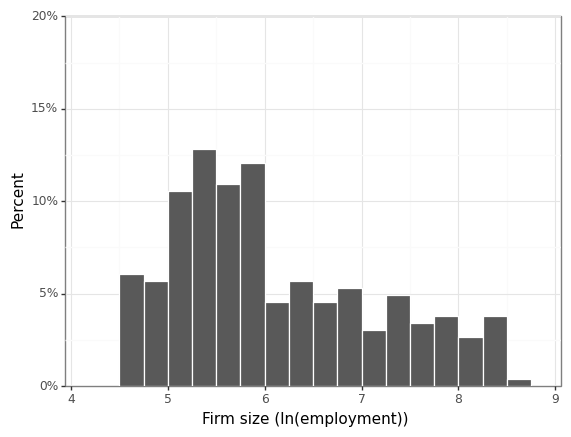

<ggplot: (121603508179)>

In [308]:
(
    ggplot(df, aes(x="lnemp"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        color="white",
        binwidth=0.25,
        boundary=0,
        closed="left",
    )
    + labs(x="Firm size (ln(employment))", y="Percent")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 9))
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.2),
        labels=percent_format(),
    )
    + theme_bw()
)


In [309]:
df["emp3bins"] = np.where(df["emp_firm"] < 200, 1, pd.np.nan)
df["emp3bins"] = np.where(
    (df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), 2, df["emp3bins"]
)
df["emp3bins"] = np.where(df["emp_firm"] >= 1000, 3, df["emp3bins"])

In [310]:
df["emp3bins"].describe()


count    265.000000
mean       2.018868
std        0.704170
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: emp3bins, dtype: float64

### Figure 4.3 Quality of specific management practices by three bins of firm size: conditional probabilities

(a) Lean management

In [311]:
df1 = (
    df.filter(["emp3bins", "lean1"])
    .groupby(["emp3bins", "lean1"])
    .agg(Count=("emp3bins", "size"))
    .reset_index()
)
df1["Group_count"] = df1.groupby("emp3bins")["Count"].transform("sum")
df1["Percent"] = df1["Count"] / df1["Group_count"]
df1["lean1"] = pd.Categorical(
    df1["lean1"], categories=sorted(set(df1["lean1"]), reverse=True)
)
df1["emp3bins"] = pd.Categorical(
    df1["emp3bins"], categories=sorted(set(df1["emp3bins"]), reverse=True)
)

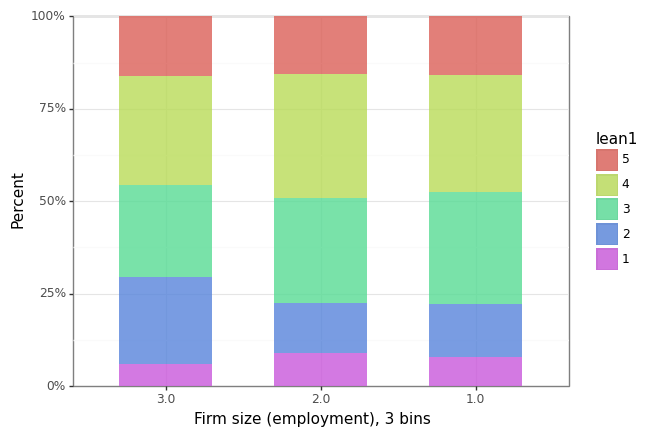

<ggplot: (121605370001)>

In [312]:
(
    ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")

)


(b) Performance tracking

In [313]:
df1 = (
    df.filter(["emp3bins", "perf2"])
    .groupby(["emp3bins", "perf2"])
    .agg(Count=("emp3bins", "size"))
    .reset_index()
)
df1["Group_count"] = df1.groupby("emp3bins")["Count"].transform("sum")
df1["Percent"] = df1["Count"] / df1["Group_count"]
df1["perf2"] = pd.Categorical(
    df1["perf2"], categories=sorted(set(df1["perf2"]), reverse=True)
)
df1["emp3bins"] = pd.Categorical(
    df1["emp3bins"], categories=sorted(set(df1["emp3bins"]), reverse=True)
)

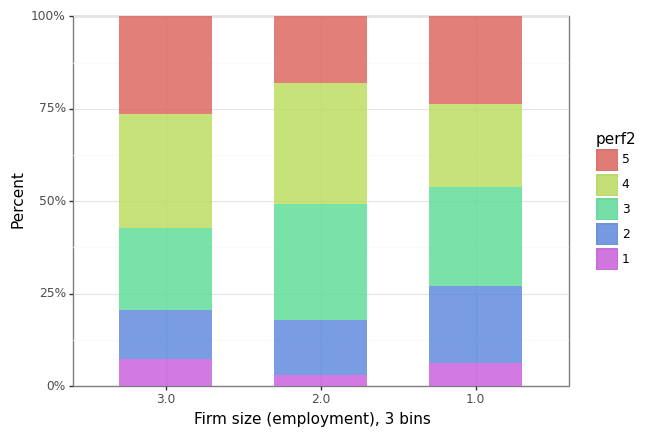

<ggplot: (121606680811)>

In [314]:
(
    ggplot(df1, aes(x="emp3bins", y="Percent", fill="perf2"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")
    

)

In [315]:
# Bin scatters avg score by employment bins

# Option 1: create 3 bins as defined by thresholds

# Summary

df.groupby("emp3bins")["emp_firm"].agg(["min", "max", "mean", "median", np.std, "size"])

,min,max,mean,median,std,size
emp3bins,,,,,,
1.0,100.0,197.0,142.285714,150.0,29.987325,63
2.0,200.0,950.0,395.611940,350.0,189.029055,134
3.0,1000.0,5000.0,2299.941176,2000.0,1147.381989,68


In [316]:
# Recode employee bins
df["emp3bins"] = df["emp3bins"].replace(1, 150).replace(2, 600).replace(3, 3000)


In [317]:
# Summary
df.groupby("emp3bins")["emp_firm"].agg(["min", "max", "mean", "median", np.std, "size"])

,min,max,mean,median,std,size
emp3bins,,,,,,
150.0,100.0,197.0,142.285714,150.0,29.987325,63
600.0,200.0,950.0,395.611940,350.0,189.029055,134
3000.0,1000.0,5000.0,2299.941176,2000.0,1147.381989,68


In [318]:
# Generate variables by mean
df1 = (
    df.groupby("emp3bins").agg(management_emp3bins=("management", "mean")).reset_index()
)
df1


,emp3bins,management_emp3bins
0,150.0,3.242038
1,600.0,3.346296
2,3000.0,3.449923


### Figure 4.4 Mean management quality score and firm size

(a) Three bins of employment

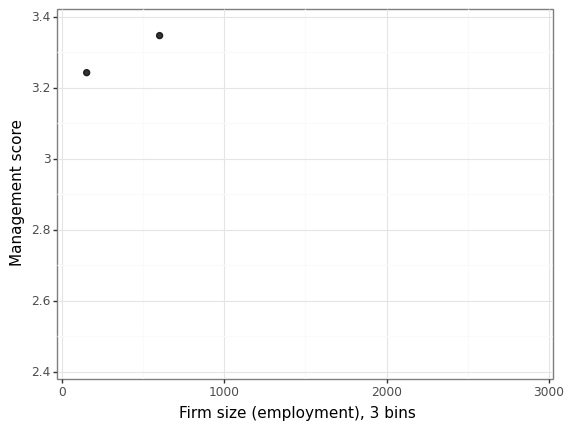

<ggplot: (121606648703)>

In [319]:
(
    ggplot(df1, aes(x="emp3bins", y="management_emp3bins"))
    + geom_point(size=2, alpha=0.8, na_rm=True)
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.4, 3.4),
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 3000),
    )
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + theme_bw()
)

In [320]:
df["emp10bins"] = pd.qcut(df["emp_firm"], 10)


In [321]:
# Summary
df_summary = (
    df.filter(["emp_firm", "emp10bins"])
    .groupby("emp10bins")
    .agg(["min", "max", "mean", "median", np.std, "size"])
)
df_summary


emp_firm                                              
                      min     max         mean  median         std size
emp10bins                                                              
(99.999, 140.0]     100.0   140.0   114.142857   110.0   13.836919   28
(140.0, 175.0]      142.0   175.0   156.115385   150.0   10.618199   26
(175.0, 220.0]      182.0   220.0   201.266667   200.0   10.849864   30
(220.0, 254.2]      226.0   250.0   242.863636   247.0    8.362589   22
(254.2, 350.0]      257.0   350.0   314.848485   315.0   31.705797   33
(350.0, 450.0]      360.0   450.0   406.142857   400.0   22.696444   21
(450.0, 700.0]      460.0   700.0   588.807692   600.0   73.686916   26
(700.0, 1300.4]     750.0  1292.0   965.538462  1000.0  150.249188   26
(1300.4, 2371.6]   1334.0  2350.0  1752.269231  1700.0  292.407874   26
(2371.6, 5000.0]   2386.0  5000.0  3512.777778  3600.0  773.808232   27

In [322]:
# Recode with bin means
df = df.replace({"emp10bins": df_summary["emp_firm"]["mean"].to_dict()})


In [323]:
df.groupby("emp10bins")["emp_firm"].agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

,min,max,mean,median,std,size
emp10bins,,,,,,
114.14285714285714,100.0,140.0,114.142857,110.0,13.836919,28
156.1153846153846,142.0,175.0,156.115385,150.0,10.618199,26
201.26666666666668,182.0,220.0,201.266667,200.0,10.849864,30
242.86363636363637,226.0,250.0,242.863636,247.0,8.362589,22
314.8484848484849,257.0,350.0,314.848485,315.0,31.705797,33
406.14285714285717,360.0,450.0,406.142857,400.0,22.696444,21
588.8076923076923,460.0,700.0,588.807692,600.0,73.686916,26
965.5384615384615,750.0,1292.0,965.538462,1000.0,150.249188,26
1752.2692307692307,1334.0,2350.0,1752.269231,1700.0,292.407874,26


In [324]:
# Generate variables by mean
df1 = (
    df.groupby("emp10bins")
    .agg(management_emp10bins=("management", "mean"))
    .reset_index()
    .assign(emp10bins = lambda x: x["emp10bins"].astype(int))
)
df1


,emp10bins,management_emp10bins
0,114,3.271825
1,156,3.171946
2,201,3.418410
3,242,3.346652
4,314,3.229377
5,406,3.590819
6,588,3.134615
7,965,3.587984
8,1752,3.519231
9,3512,3.286008


(b) Ten bins of employment

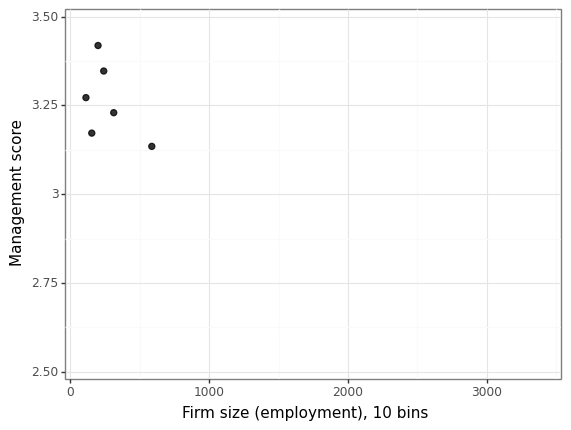

<ggplot: (121606001689)>

In [325]:
(
    ggplot(df1, aes(x="emp10bins", y="management_emp10bins"))
    + geom_point(size=2, alpha=0.8, na_rm=True)
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.5, 3.5),
    )
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 3500),
    )
    + labs(x="Firm size (employment), 10 bins", y="Management score")
    + theme_bw()
)


### Figure 4.5 The joint distribution of the management quality score and firm size

(a) By employment

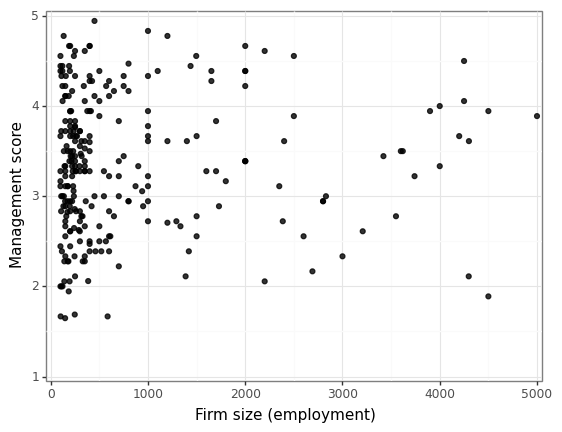

<ggplot: (121605370142)>

In [326]:
(
    ggplot(df, aes(x="emp_firm", y="management"))
    + geom_point(size=1.5, alpha=0.8, show_legend=False, na_rm=True)
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 5000))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5))
    + labs(x="Firm size (employment)", y="Management score")
    + theme_bw()
)

(b) By log employment

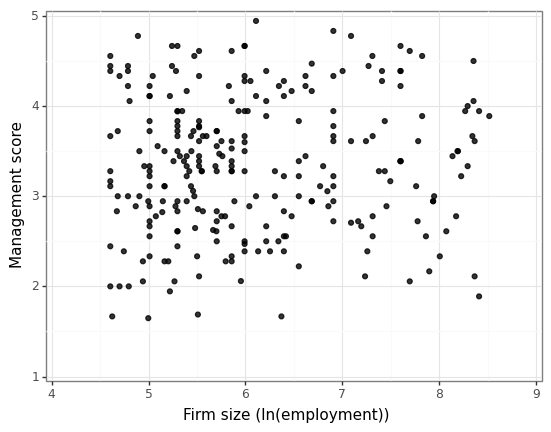

<ggplot: (121606395628)>

In [327]:
df["lnemp"] = np.log(df["emp_firm"])

(
    ggplot(df, aes(x="lnemp", y="management"))
    + geom_point(size=1.5, alpha=0.8, show_legend=False, na_rm=True)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(4, 9))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5))
    + labs(x="Firm size (ln(employment))", y="Management score")
    + theme_bw()
)


### Figure 4.6 Conditional summary statistics of the management score by bins of firm size

In [328]:
df = df.replace({"emp3bins": {150: "Small", 600: "Medium", 3000: "Large"}})
df['emp3bins'] = pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))

Box plots

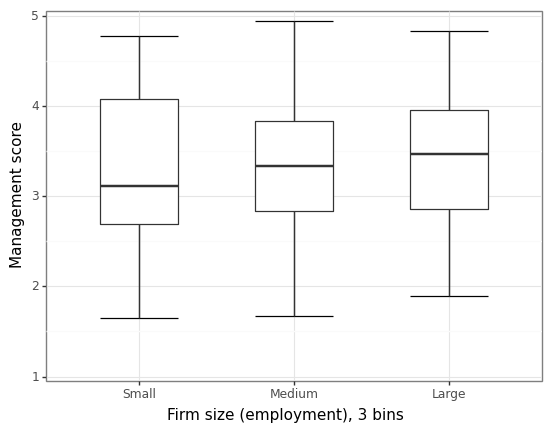

<ggplot: (121606289051)>

In [329]:
(
    ggplot(df, aes(x="emp3bins", y="management", group="emp3bins"))
    + stat_boxplot(
        geom="errorbar",
        width=0.5,
        size=0.5,
        na_rm=True,
    )
    + geom_boxplot(
        size=0.5, width=0.5, na_rm=True
    )
    + labs(x="Firm size (employment), 3 bins", y="Management score")
    + scale_y_continuous(expand=(0.01, 0.01), limits=(1, 5), )
    + theme_bw()
)

In [330]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
sns.set_style("whitegrid")

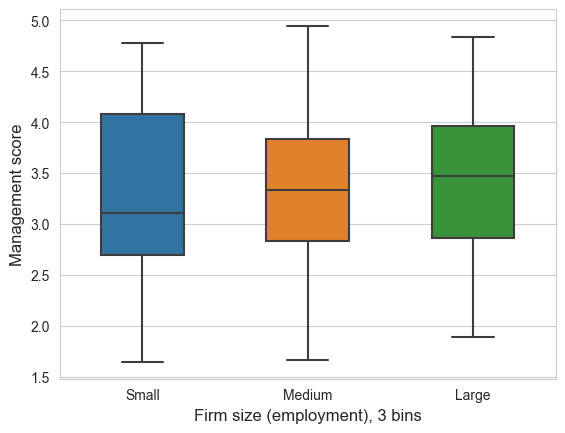

In [331]:
fig, ax = plt.subplots()
sns.boxplot(
     data=df, x="emp3bins", y="management", width=0.5, ax=ax, flierprops={"marker": "o"}
)
plt.ylabel("Management score", size=12)
plt.xlabel("Firm size (employment), 3 bins", size=12)
plt.show()

Violin plot

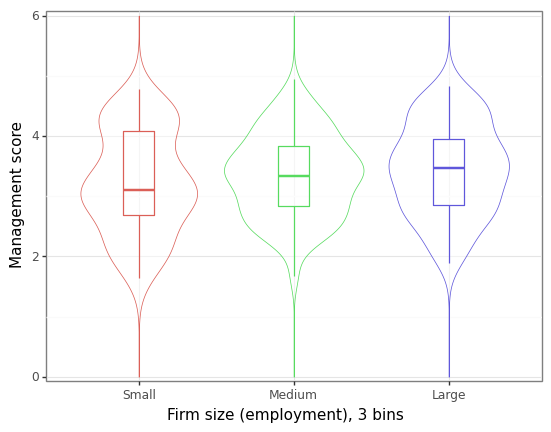

<ggplot: (121606213326)>

In [332]:
(
    ggplot(
        df,
        aes(x="emp3bins", y="management", color="emp3bins", group="emp3bins"),
    )
    + geom_violin(size=0.3, alpha=0.5, trim=False, show_legend=False, na_rm=True)
    + geom_boxplot(size=0.5, width=0.2, alpha=0.3, na_rm=True)
    + labs(x="Firm size (employment), 3 bins", y="Management score")
  
    + scale_y_continuous(expand=(0.01, 0.01), limits=(0, 6),)
    + guides(fill=False, color=False)
    + theme_bw()
)

In [333]:
# Correlation
df["management"].corr(df["emp_firm"])

0.044357408762736784

In [334]:
# by industry
df.loc[df["sic"] <= 21, "industry_broad"] = "food_drinks_tobacco"
df.loc[
    ((df["sic"] >= 22) & (df["sic"] <= 23)) | (df["sic"] == 31), "industry_broad"
] = "textile_apparel_leather_etc"
df.loc[(df["sic"] >= 24) & (df["sic"] <= 27), "industry_broad"] = "wood_furniture_paper"
df.loc[(df["sic"] >= 28) & (df["sic"] <= 30), "industry_broad"] = "chemicals_etc"
df.loc[(df["sic"] >= 32) & (df["sic"] < 35), "industry_broad"] = "materials_metals"
df.loc[(df["sic"] >= 35) & (df["sic"] < 37), "industry_broad"] = "electronics"
df.loc[df["sic"] == 37, "industry_broad"] = "auto"
df.loc[df["sic"] >= 38, "industry_broad"] = "other"

In [335]:
df["industry_broad"].value_counts()


electronics                    87
other                          63
chemicals_etc                  36
materials_metals               29
wood_furniture_paper           16
auto                           15
textile_apparel_leather_etc    10
food_drinks_tobacco             9
Name: industry_broad, dtype: int64

In [336]:
# Correlation
df.groupby("industry_broad")["management", "emp_firm"].corr().iloc[0::2, -1]


industry_broad                         
auto                         management    0.121824
chemicals_etc                management    0.131714
electronics                  management    0.033020
food_drinks_tobacco          management    0.334313
materials_metals             management    0.130230
other                        management   -0.027962
textile_apparel_leather_etc  management    0.160352
wood_furniture_paper         management    0.403814
Name: emp_firm, dtype: float64

In [337]:
# Correlation
cor = (
    df.groupby("industry_broad")["management", "emp_firm"]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .drop(["level_1"], axis=1)
    .set_index("industry_broad")
    .rename({"emp_firm": "correlation"}, axis=1)
)
cor.round(3)

,correlation
industry_broad,
auto,0.122
chemicals_etc,0.132
electronics,0.033
food_drinks_tobacco,0.334
materials_metals,0.130
other,-0.028
textile_apparel_leather_etc,0.160
wood_furniture_paper,0.404


In [338]:
table41 = (
    df.filter(["emp_firm", "industry_broad", "management"])
    .groupby("industry_broad")
    .agg(Mean=("management", "mean"), Obs=("management", "size"))
)
table41["Corr"] = cor["correlation"]

In [339]:
table41.index = [
    "Auto",
    "Chemicals",
    "Machinery, equipment, electronics",
    "Food, drinks, tobacco",
    "Materials, metals",
    "Textile, apparel, leather",
    "Wood, furniture, paper",
    "Other",
]
table41.round(3)


,Mean,Obs,Corr
Auto,3.689,15,0.122
Chemicals,3.243,36,0.132
"Machinery, equipment, electronics",3.539,87,0.033
"Food, drinks, tobacco",3.232,9,0.334
"Materials, metals",2.808,29,0.130
"Textile, apparel, leather",3.503,63,-0.028
"Wood, furniture, paper",3.222,10,0.160
Other,2.742,16,0.404


In [340]:
last_row = (
    table41.groupby(lambda _: True)
    .agg(Mean=("Mean", "mean"), Obs=("Obs", "sum"), Corr=("Corr", "mean"))
    .reset_index(drop=True)
)
last_row.index = ["All"]
table41 = table41.append(last_row)

In [341]:
table41 = table41.filter(["Corr", "Mean", "Obs"]).reset_index()
table41.columns = [
    "Industry",
    "Management - employment correlation",
    "Management score",
    "Observations",
]

In [342]:
table41.round(2)


,Industry,Management - employment correlation,Management score,Observations
0,Auto,0.12,3.69,15
1,Chemicals,0.13,3.24,36
2,"Machinery, equipment, electronics",0.03,3.54,87
3,"Food, drinks, tobacco",0.33,3.23,9
4,"Materials, metals",0.13,2.81,29
5,"Textile, apparel, leather",-0.03,3.50,63
6,"Wood, furniture, paper",0.16,3.22,10
7,Other,0.40,2.74,16
8,All,0.16,3.25,265



## Chapter 03 plots
---------------------------------------------------------------

In [350]:
df2 = df.loc[df["emp3bins"] == "Small", ["emp3bins", "management"]]

In [351]:
q1 = np.quantile(df2["management"], 0.25)
q2 = np.quantile(df2["management"], 0.5)
q3 = np.quantile(df2["management"], 0.75)
iqr = q3 - q1
ub = max(df2.loc[df2["management"] < q3 + 1.5 * iqr, "management"])
lb = min(df2.loc[df2["management"] >= q1 - 1.5 * iqr, "management"])
out_lb = min(df2["management"])
min = min(df["management"])
max = max(df["management"])

TypeError: 'float' object is not callable

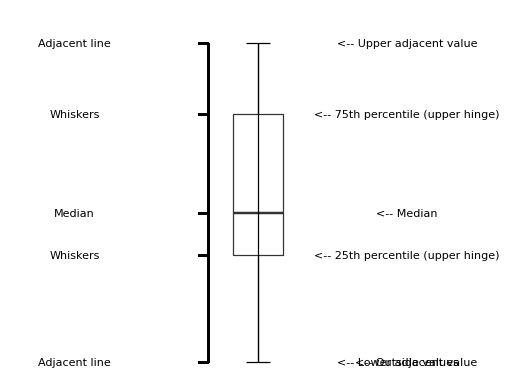

<ggplot: (121605124313)>

In [352]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_boxplot(
       size=0.5, width=0.1, alpha=0.5, na_rm=True
    )
    + stat_boxplot(geom="errorbar", width=0.05, size=0.5, na_rm=True)
    + scale_y_continuous(limits=(min, max))
    + annotate("text", x=1.3, y=ub, label="<-- Upper adjacent value", size=8)
    + annotate("text", x=1.3, y=q3, label="<-- 75th percentile (upper hinge)", size=8)
    + annotate("text", x=1.3, y=q2, label="<-- Median", size=8)
    + annotate("text", x=1.3, y=q1, label="<-- 25th percentile (upper hinge)", size=8)
    + annotate("text", x=1.3, y=lb, label="<-- Lower adjacent value", size=8)
    + annotate("text", x=1.3, y=out_lb, label="<-- Outside values", size=8)
    + annotate("text", x=0.63, y=ub, label="Adjacent line", size=8)
    + annotate("text", x=0.63, y=q3, label="Whiskers", size=8)
    + annotate("text", x=0.63, y=q2, label="Median", size=8)
    + annotate("text", x=0.63, y=q1, label="Whiskers", size=8)
    + annotate("text", x=0.63, y=lb, label="Adjacent line", size=8)
    + geom_segment(aes(x=0.9, y=lb, xend=0.9, yend=ub))
    + geom_segment(aes(x=0.88, y=lb, xend=0.9, yend=lb))
    + geom_segment(aes(x=0.88, y=q1, xend=0.9, yend=q1))
    + geom_segment(aes(x=0.88, y=q2, xend=0.9, yend=q2))
    + geom_segment(aes(x=0.88, y=q3, xend=0.9, yend=q3))
    + geom_segment(aes(x=0.88, y=ub, xend=0.9, yend=ub))
    + theme_bw()
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        axis_ticks=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
    )
)

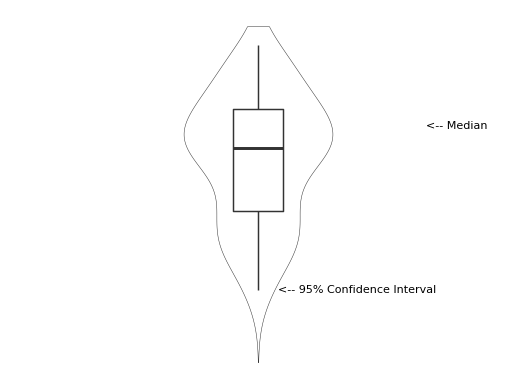

<ggplot: (121605948089)>

In [349]:
(
    ggplot(df2, aes(x="emp3bins", y="management"))
    + geom_violin(
        size=0.2,
        width=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
        alpha=0.3,
    )
    + geom_boxplot(
        size=0.6,
        width=0.1,
        alpha=0.5,
        na_rm=True,
        outlier_color="",
    )
    + annotate("text", x=1.2, y=ub, label="<-- 95% Confidence Interval", size=8)
    + annotate("text", x=1.2, y=lb, label="<-- 95% Confidence Interval", size=8)
    + annotate("text", x=1.4, y=q3, label="<-- Interquartile range", size=8)
    + annotate("text", x=1.4, y=q2, label="<-- Median", size=8)
    + ylim(1, 4)
    + theme_bw()
    + theme(
        axis_title_x=element_blank(),
        axis_line_x=element_blank(),
        axis_ticks=element_blank(),
        axis_text_x=element_blank(),
        axis_title_y=element_blank(),
        axis_line_y=element_blank(),
        axis_text_y=element_blank(),
        panel_grid=element_blank(),
        panel_border=element_blank(),
    )
)